In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import yaml  # type: ignore

sns.set_style('darkgrid')

In [2]:
with open("../settings.yml", "r") as yamlfile:
    config = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [3]:
qrels = pd.read_csv("../"+config["WT"]["train"]["qrels"], sep=' ', names=['query', '0', 'docid', 'label'])

In [4]:
plt.rcParams.update({'font.size': 14})

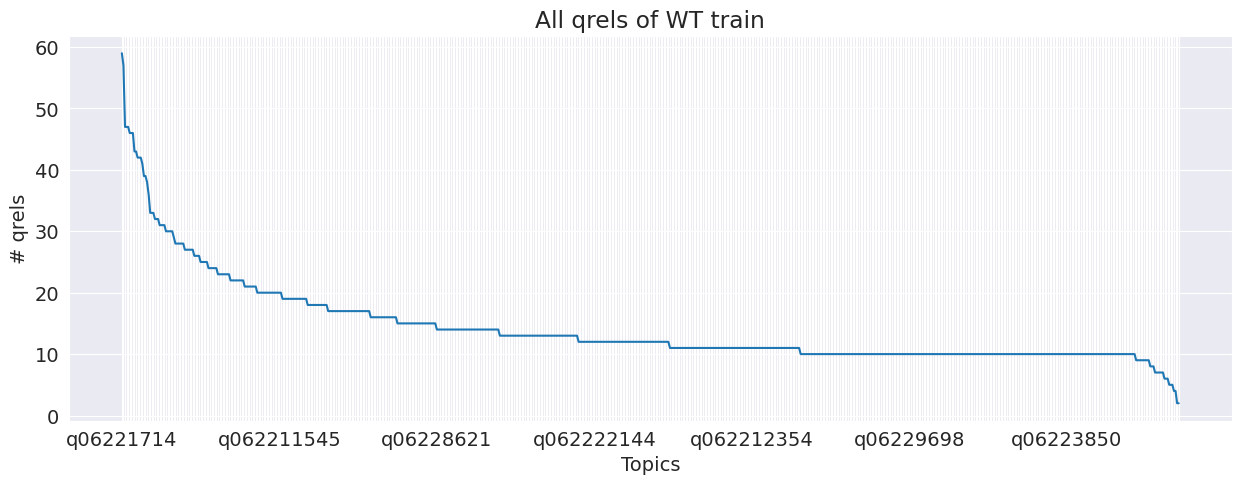

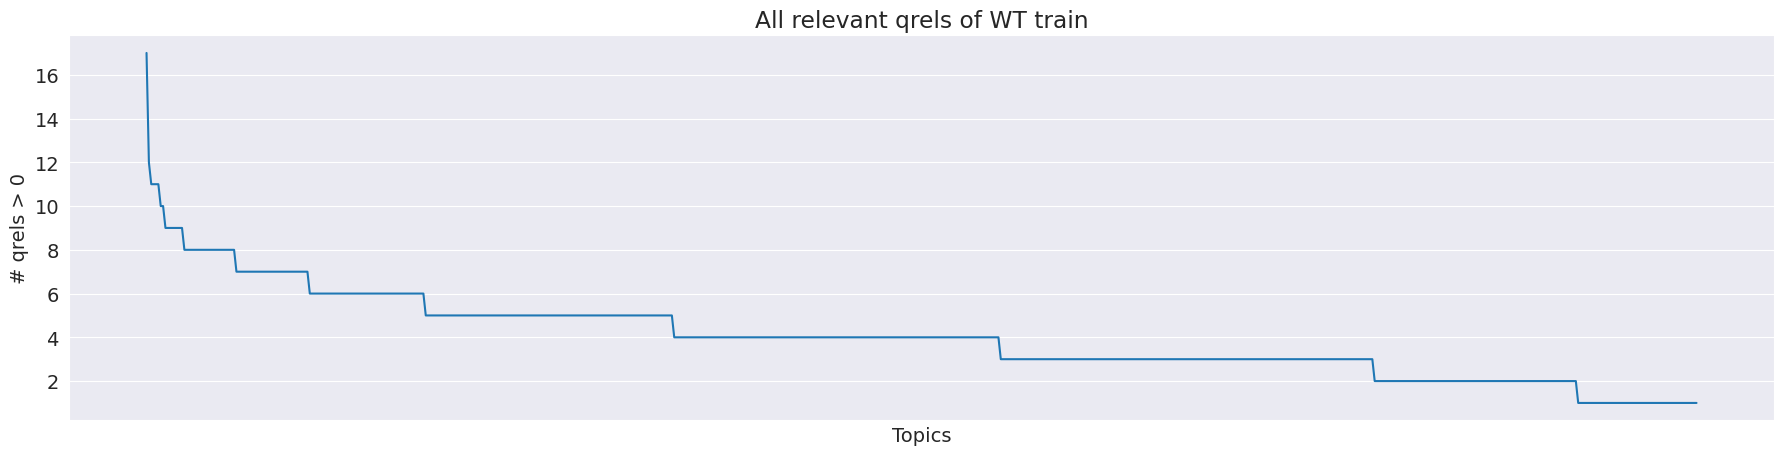

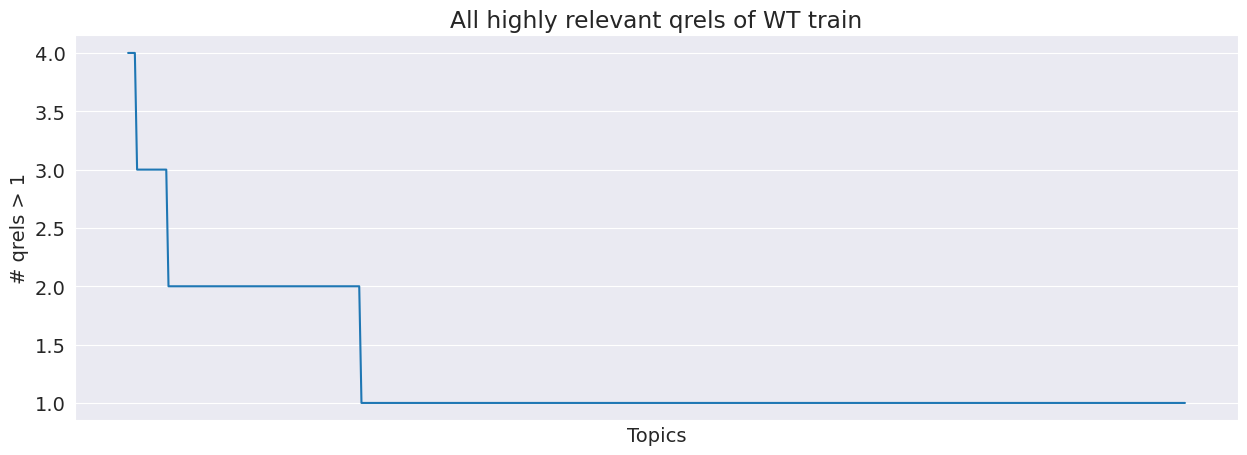

In [23]:
all = qrels.groupby('query').count()['label'].sort_values(ascending=False)
ax = all.plot(figsize=(15,5), xlabel='Topics', ylabel='# qrels', title='All qrels of WT train')
ax.set_xticks(list(all.reset_index().index))
plt.show()

positive = qrels[qrels['label'] > 0].groupby('query').count()['label'].sort_values(ascending=False)
ax = positive.plot(figsize=(22,5), xlabel='Topics', ylabel='# qrels > 0', title='All relevant qrels of WT train')
ax.set_xticks([])
plt.show()

positive = qrels[qrels['label'] > 1].groupby('query').count()['label'].sort_values(ascending=False)
ax = positive.plot(figsize=(15,5), xlabel='Topics', ylabel='# qrels > 1', title='All highly relevant qrels of WT train')
ax.set_xticks([])
plt.show()

In [37]:
qrels.groupby('query').count().describe()

,0,docid,label
count,672.000000,672.000000,672.000000
mean,14.369048,14.369048,14.369048
std,7.222716,7.222716,7.222716
min,2.000000,2.000000,2.000000
25%,10.000000,10.000000,10.000000
50%,12.000000,12.000000,12.000000
75%,16.000000,16.000000,16.000000
max,59.000000,59.000000,59.000000


In [38]:
qrels.groupby('query').count().var()

0        52.167625
docid    52.167625
label    52.167625
dtype: float64

In [39]:
positive.describe()

count    472.000000
mean       1.266949
std        0.553630
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: label, dtype: float64

In [19]:
topics = pd.read_csv("../"+config["WT"]["train"]["topics"].replace("trec", "tsv"), sep='\t', names=["qid" , 'query'])

In [26]:
# 16 qrels have no relevant documents
qrels.groupby("query").sum()[qrels.groupby("query").sum()["label"]==0].merge(topics, left_index=True, right_on="qid")

/tmp/ipykernel_48868/3021833845.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qrels.groupby("query").sum()[qrels.groupby("query").sum()["label"]==0].merge(topics, left_index=True, right_on="qid")
/tmp/ipykernel_48868/3021833845.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qrels.groupby("query").sum()[qrels.groupby("query").sum()["label"]==0].merge(topics, left_index=True, right_on="qid")


,0,label,qid,query
310,0,0,q062210081,consumption water home
381,0,0,q062212442,Veal shoulder
417,0,0,q062214218,the curtained redoubt
461,0,0,q062215377,Bordeaux ring ring-road dir.
23,0,0,q062216451,chateau cathare
184,0,0,q062218529,water collector
207,0,0,q062219081,Waterfowl
581,0,0,q062220780,used car rental
98,0,0,q062222125,least expensive electric car
611,0,0,q062222134,Most reliable cars
